In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [56]:
list_G_1 = [None]*10
for i in range(10):
    df_G_1 = pd.read_csv(r'Energy/Energy_Channel/G_O_Gamma_N'+str(i+1)+'.txt', sep='\t', header = None)
    MOG_energy_1 = df_G_1.values
    list_G_1[i] = MOG_energy_1

In [65]:
MOG_energy_1 = list_G_1[0]
MOG_energy_2 = list_G_1[1]
MOG_energy_5 = list_G_1[4]
MOG_energy_9 = list_G_1[8]
#MOG_energy_10 = list_G_1[9]

In [66]:
print(np.shape(MOG_energy_1))

(100000, 61)


0.33255142370839424
0.3325514237083943


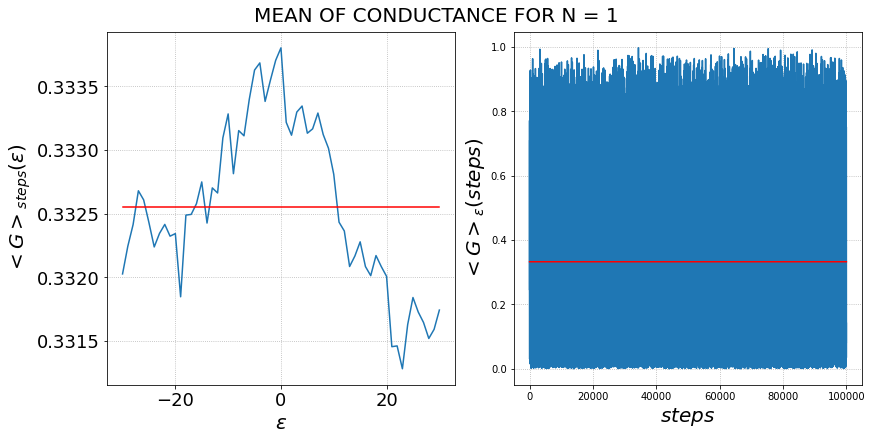

In [67]:
(rows, columns) = np.shape(MOG_energy_1)
mean_mean_G_energy = [np.mean(np.mean(MOG_energy_1,axis = 0)) for i in range(columns)]
mean_mean_aux = np.mean(np.mean(MOG_energy_1,axis = 1))
mean_mean_G_energy_1 = [mean_mean_aux for i in range(rows)]
fig, axs = plt.subplots(1,2, figsize = (12,6), constrained_layout = True)
fig.suptitle(r'MEAN OF CONDUCTANCE FOR N = 1', fontsize = 20)


axs[0].plot([(i-30) for i in range(columns)], np.mean(MOG_energy_1,axis = 0))
axs[0].plot([(i-30) for i in range(columns)], mean_mean_G_energy, color = 'red')

axs[1].plot(np.mean(MOG_energy_1,axis = 1))
axs[1].plot([i for i in range(rows)], mean_mean_G_energy_1, color = 'red')


axs[0].set_ylabel(r'$<G>_{steps}(\epsilon)$', fontsize = 20)
axs[0].set_xlabel(r'$\epsilon$', fontsize = 20)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].grid(linestyle = ':')


axs[1].set_ylabel(r'$<G>_{\epsilon}(steps)$', fontsize = 20)
axs[1].set_xlabel(r'$steps$', fontsize = 20)
#axs[1].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[1].grid(linestyle = ':')

print(mean_mean_G_energy[0])
print(mean_mean_G_energy_1[0])


0.7982624459050697
0.7982624459050696


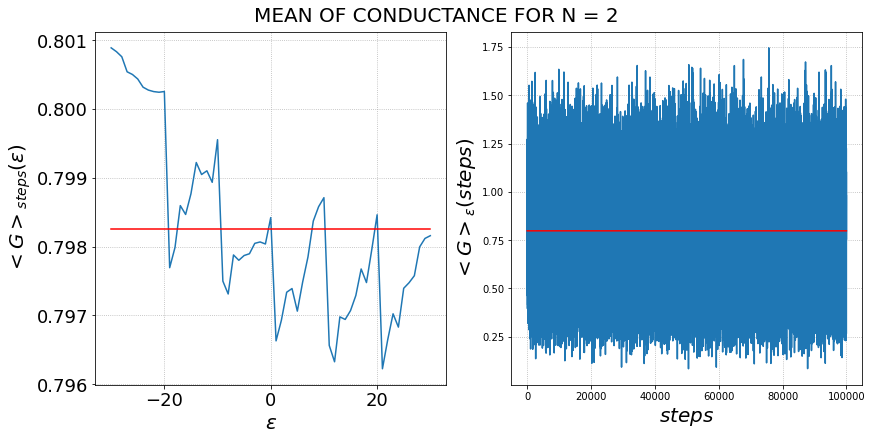

In [68]:
(rows, columns) = np.shape(MOG_energy_2)
mean_mean_G_energy = [np.mean(np.mean(MOG_energy_2,axis = 0)) for i in range(columns)]
mean_mean_aux = np.mean(np.mean(MOG_energy_2,axis = 1))
mean_mean_G_energy_1 = [mean_mean_aux for i in range(rows)]
fig, axs = plt.subplots(1,2, figsize = (12,6), constrained_layout = True)
fig.suptitle(r'MEAN OF CONDUCTANCE FOR N = 2', fontsize = 20)


axs[0].plot([(i-30) for i in range(columns)], np.mean(MOG_energy_2,axis = 0))
axs[0].plot([(i-30) for i in range(columns)], mean_mean_G_energy, color = 'red')

axs[1].plot(np.mean(MOG_energy_2,axis = 1))
axs[1].plot([i for i in range(rows)], mean_mean_G_energy_1, color = 'red')


axs[0].set_ylabel(r'$<G>_{steps}(\epsilon)$', fontsize = 20)
axs[0].set_xlabel(r'$\epsilon$', fontsize = 20)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].grid(linestyle = ':')


axs[1].set_ylabel(r'$<G>_{\epsilon}(steps)$', fontsize = 20)
axs[1].set_xlabel(r'$steps$', fontsize = 20)
#axs[1].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[1].grid(linestyle = ':')

print(mean_mean_G_energy[0])
print(mean_mean_G_energy_1[0])

2.2515760176837705
2.251576017683771


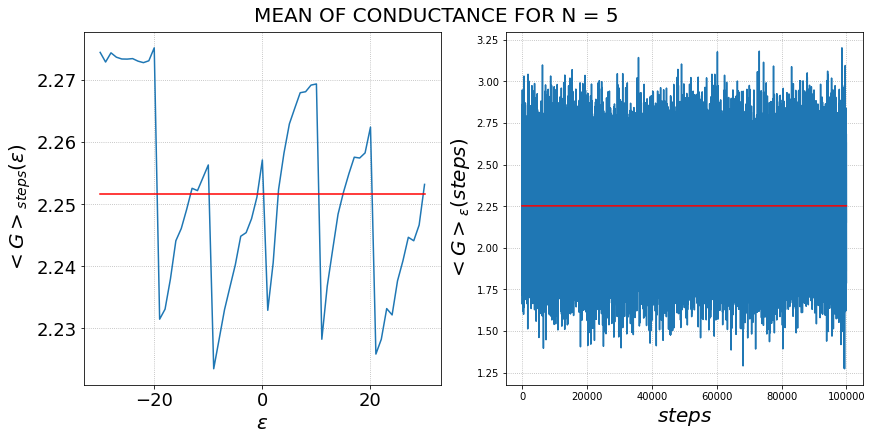

In [69]:
(rows, columns) = np.shape(MOG_energy_5)
mean_mean_G_energy = [np.mean(np.mean(MOG_energy_5,axis = 0)) for i in range(columns)]
mean_mean_aux = np.mean(np.mean(MOG_energy_5,axis = 1))
mean_mean_G_energy_1 = [mean_mean_aux for i in range(rows)]
fig, axs = plt.subplots(1,2, figsize = (12,6), constrained_layout = True)
fig.suptitle(r'MEAN OF CONDUCTANCE FOR N = 5', fontsize = 20)


axs[0].plot([(i-30) for i in range(columns)],np.mean(MOG_energy_5,axis = 0))
axs[0].plot([(i-30) for i in range(columns)], mean_mean_G_energy, color = 'red')

axs[1].plot(np.mean(MOG_energy_5,axis = 1))
axs[1].plot([i for i in range(rows)], mean_mean_G_energy_1, color = 'red')


axs[0].set_ylabel(r'$<G>_{steps}(\epsilon)$', fontsize = 20)
axs[0].set_xlabel(r'$\epsilon$', fontsize = 20)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].grid(linestyle = ':')


axs[1].set_ylabel(r'$<G>_{\epsilon}(steps)$', fontsize = 20)
axs[1].set_xlabel(r'$steps$', fontsize = 20)
#axs[1].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[1].grid(linestyle = ':')

print(mean_mean_G_energy[0])
print(mean_mean_G_energy_1[0])

4.165198294070056
4.165198294070055


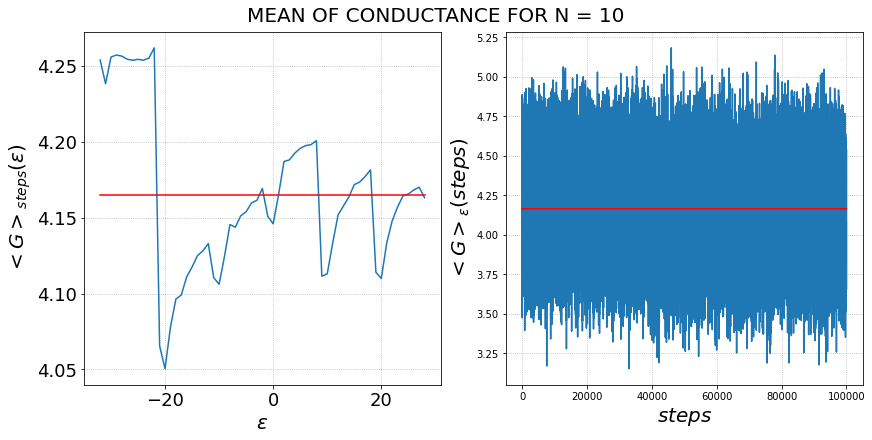

In [80]:
(rows, columns) = np.shape(MOG_energy_9)
mean_mean_G_energy = [np.mean(np.mean(MOG_energy_9,axis = 0)) for i in range(columns)]
mean_mean_aux = np.mean(np.mean(MOG_energy_9,axis = 1))
mean_mean_G_energy_1 = [mean_mean_aux for i in range(rows)]
fig, axs = plt.subplots(1,2, figsize = (12,6), constrained_layout = True)
fig.suptitle(r'MEAN OF CONDUCTANCE FOR N = 10', fontsize = 20)


axs[0].plot([(i-32) for i in range(columns)], np.mean(MOG_energy_9,axis = 0))
axs[0].plot([(i-32) for i in range(columns)], mean_mean_G_energy, color = 'red')

axs[1].plot(np.mean(MOG_energy_9,axis = 1))
axs[1].plot([i for i in range(rows)], mean_mean_G_energy_1, color = 'red')


axs[0].set_ylabel(r'$<G>_{steps}(\epsilon)$', fontsize = 20)
axs[0].set_xlabel(r'$\epsilon$', fontsize = 20)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].grid(linestyle = ':')


axs[1].set_ylabel(r'$<G>_{\epsilon}(steps)$', fontsize = 20)
axs[1].set_xlabel(r'$steps$', fontsize = 20)
#axs[1].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[1].grid(linestyle = ':')

print(mean_mean_G_energy[0])
print(mean_mean_G_energy_1[0])

In [71]:
def Auto_correlation(MOG_energy):
    (rows, columns) = np.shape(MOG_energy)
    geg0 = np.zeros((rows, columns))
    c = np.zeros((1, columns))
    for j in range(columns):
        geg0[:,j] = np.multiply(MOG_energy[:,j], MOG_energy[:,0])
        c[0,j] = (np.mean(geg0[:,j], axis = 0)-np.multiply(np.mean(MOG_energy[:,j], axis = 0),np.mean(MOG_energy[:,0], axis = 0)))/(np.var(MOG_energy[:,0], axis = 0))
    return c

In [72]:
c_1 = Auto_correlation(MOG_energy_1)
c_2 = Auto_correlation(MOG_energy_2)
c_5 = Auto_correlation(MOG_energy_5)
c_10 = Auto_correlation(MOG_energy_9)

In [73]:
(rows, columns) = np.shape(c_1)

x = np.zeros((1,columns))
x = [(1/20)*i for i in range(columns)]

In [74]:
def Lorentzian(x, small_gamma):
    columns = np.size(x)
    p = [0 for i in range(columns)]
    for j in range(columns):
        p[j] = 1/(1+(x[j]/small_gamma)**2)
    return p

(0.0, 1.1)

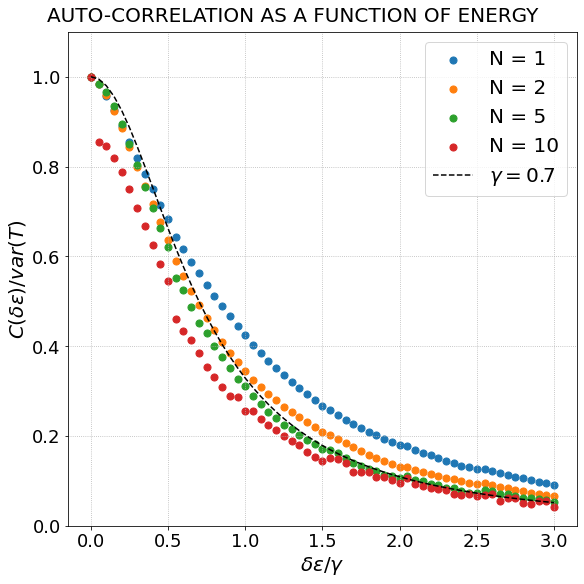

In [75]:
fig, axs = plt.subplots(1,1, figsize = (8,8), constrained_layout = True)
fig.suptitle(r'AUTO-CORRELATION AS A FUNCTION OF ENERGY', fontsize = 20)


axs.scatter(x, c_1, s = 50, label = 'N = 1')
axs.scatter(x, c_2, s = 50, label = 'N = 2')
axs.scatter(x, c_5, s = 50, label = 'N = 5')
axs.scatter(x, c_10, s = 50, label = 'N = 10')

axs.plot(x, Lorentzian(x, 0.7), label = r'$\gamma = 0.7$', color = 'black', linestyle = 'dashed')

axs.set_ylabel(r'$C(\delta \epsilon) / var(T)$', fontsize = 20)
axs.set_xlabel(r'$\delta \epsilon / \gamma$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.grid(linestyle = ':')
axs.legend(fontsize = 20)
axs.set_ylim((0,1.1))

In [76]:
def Mean_Density_of_Max(MOG_energy, N):
    (rows, columns) = np.shape(MOG_energy)
    max_counter = np.zeros((rows, columns))
    gamma = 0.7
    for i in range(rows):
        for j in range(1,columns-1):
            if ((MOG_energy[i,j-1] < MOG_energy[i,j]) and (MOG_energy[i,j] > MOG_energy[i,j+1])):
                max_counter[i,j] = 1
    rho = np.sum(max_counter, axis = 1)
    rho_mean = np.mean(rho)
    rho_mean_by_energy = rho_mean/(columns*0.1/2) #interval: [0, 3]
    Constant_of_Proportionality = rho_mean_by_energy*gamma
    error_Constant_of_Proportionality = (np.std(rho*(gamma/(columns*0.1/2)))/np.sqrt(rows))
    return Constant_of_Proportionality, error_Constant_of_Proportionality

In [77]:
Density_max = np.zeros(10)
error_Density_max = np.zeros(10)
for i in range(10):
    Density_max[i], error_Density_max[i] = Mean_Density_of_Max(list_G_1[i],(i+1))

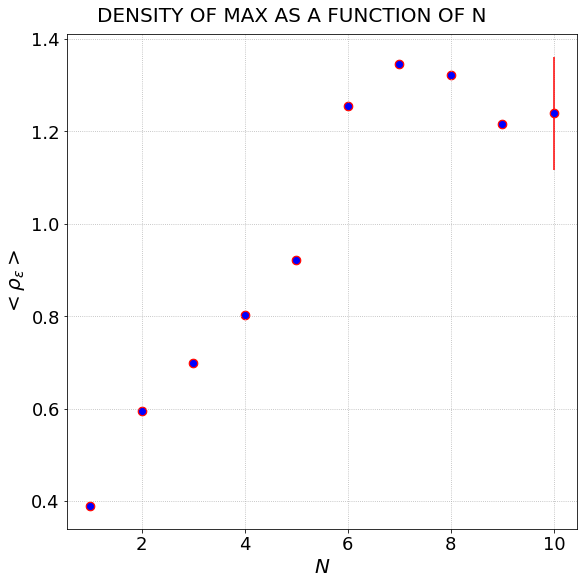

In [78]:
fig, axs = plt.subplots(1,1, figsize = (8,8), constrained_layout = True)
fig.suptitle(r'DENSITY OF MAX AS A FUNCTION OF N', fontsize = 20)

for i in range(10):
    axs.scatter((i+1), Density_max[i], s = 75, color = 'red')
    axs.errorbar((i+1), Density_max[i], yerr = error_Density_max[i],fmt='o',ecolor = 'red',color='blue')

axs.set_ylabel(r'$<\rho_{\epsilon}>$', fontsize = 20)
axs.set_xlabel(r'$N$', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.grid(linestyle = ':')
#axs.set_ylim(0.2,0.6)
#axs.legend(fontsize = 20)